In [53]:
import numpy as np 
import pandas as pd 
import warnings 
from sklearn.linear_model import Ridge 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
pesticide = pd.read_csv('crop_yields/pesticides.csv')
rainfall = pd.read_csv('crop_yields/rainfall.csv') 
temp = pd.read_csv('crop_yields/temp.csv')
yield_df = pd.read_csv('crop_yields/yield_df.csv')
yield_data = pd.read_csv('crop_yields/yield.csv')

print("=== DATASET SHAPES ===")
print(f"Pesticide: {pesticide.shape}")
print(f"Rainfall: {rainfall.shape}")
print(f"Temperature: {temp.shape}")
print(f"Yield_df: {yield_df.shape}")
print(f"Yield: {yield_data.shape}")

=== DATASET SHAPES ===
Pesticide: (4349, 7)
Rainfall: (6727, 3)
Temperature: (71311, 3)
Yield_df: (28242, 8)
Yield: (56717, 12)


In [55]:
def inspect_dataset(df, name):
    print(f"\n=== {name.upper()} DATASET ===")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:\n{df.dtypes}")
    print(f"\nFirst 3 rows:")
    print(df.head(3))
    print(f"\nMissing values: {df.isnull().sum().sum()}")
    if df.isnull().sum().sum() > 0:
        print(f"Missing by column:\n{df.isnull().sum()}")

inspect_dataset(pesticide, "yield_df")



=== YIELD_DF DATASET ===
Columns: ['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value']
Data types:
Domain      object
Area        object
Element     object
Item        object
Year         int64
Unit        object
Value      float64
dtype: object

First 3 rows:
           Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   

                           Unit  Value  
0  tonnes of active ingredients  121.0  
1  tonnes of active ingredients  121.0  
2  tonnes of active ingredients  121.0  

Missing values: 0


In [56]:
yield_df = pd.read_csv('crop_yields/yield_df.csv')

print("=== YIELD_DF DATASET (ALREADY MERGED) ===")
print(f"Shape: {yield_df.shape}")
print(f"Columns: {list(yield_df.columns)}")
print("\nFirst 5 rows:")
print(yield_df.head())

print(f"\nMissing values: {yield_df.isnull().sum().sum()}")
print(f"Data types:\n{yield_df.dtypes}")

=== YIELD_DF DATASET (ALREADY MERGED) ===
Shape: (28242, 8)
Columns: ['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

First 5 rows:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

Missing values: 0
Data types:
Unnamed: 0                      

In [57]:
def clean_crop_data(df):
    """Clean the crop yield dataset"""
    print(f"\n=== CLEANING DATA ===")
    print(f"Initial shape: {df.shape}")
    
    # Drop the unnamed index column
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
        print("Dropped 'Unnamed: 0' column")
    
    # Check for missing values in key columns
    print(f"\nMissing values by column:")
    missing = df.isnull().sum()
    for col, miss_count in missing.items():
        if miss_count > 0:
            print(f"  {col}: {miss_count} ({miss_count/len(df)*100:.1f}%)")
    
    # Remove rows with missing target (yield)
    initial_rows = len(df)
    df = df.dropna(subset=['hg/ha_yield'])
    print(f"Removed {initial_rows - len(df)} rows with missing yield")
    
    # Remove rows with missing features
    feature_cols = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
    initial_rows = len(df)
    df = df.dropna(subset=feature_cols)
    print(f"Removed {initial_rows - len(df)} rows with missing features")
    
    # Remove duplicates
    initial_rows = len(df)
    df = df.drop_duplicates()
    print(f"Removed {initial_rows - len(df)} duplicate rows")
    
    print(f"Final shape: {df.shape}")
    return df

clean_df = clean_crop_data(yield_df.copy())


=== CLEANING DATA ===
Initial shape: (28242, 8)
Dropped 'Unnamed: 0' column

Missing values by column:
Removed 0 rows with missing yield
Removed 0 rows with missing features
Removed 2310 duplicate rows
Final shape: (25932, 7)


In [58]:
def explore_data(df):
    """Quick exploration of the cleaned data"""
    print(f"\n=== DATA EXPLORATION ===")
    
    # Check unique values in categorical columns
    categorical_cols = ['Area', 'Item']
    for col in categorical_cols:
        if col in df.columns:
            unique_count = df[col].nunique()
            print(f"{col}: {unique_count} unique values")
            if unique_count <= 10:
                print(f"  Values: {df[col].unique()}")
            else:
                print(f"  Sample values: {df[col].unique()[:5]}")
    
    # Year range
    if 'Year' in df.columns:
        print(f"Year range: {df['Year'].min()} to {df['Year'].max()}")
    
    # Numeric column statistics
    numeric_cols = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
    print(f"\nNumeric column statistics:")
    for col in numeric_cols:
        if col in df.columns:
            print(f"\n{col}:")
            print(f"  Mean: {df[col].mean():.2f}")
            print(f"  Std:  {df[col].std():.2f}")
            print(f"  Min:  {df[col].min():.2f}")
            print(f"  Max:  {df[col].max():.2f}")

explore_data(clean_df)


=== DATA EXPLORATION ===
Area: 101 unique values
  Sample values: ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia']
Item: 10 unique values
  Values: ['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']
Year range: 1990 to 2013

Numeric column statistics:

hg/ha_yield:
  Mean: 76978.13
  Std:  84647.61
  Min:  50.00
  Max:  501412.00

average_rain_fall_mm_per_year:
  Mean: 1146.84
  Std:  717.39
  Min:  51.00
  Max:  3240.00

pesticides_tonnes:
  Mean: 34782.57
  Std:  57228.57
  Min:  0.04
  Max:  367778.00

avg_temp:
  Mean: 20.42
  Std:  6.44
  Min:  1.30
  Max:  30.65


In [59]:
# Filter to single crop
single_crop_data = clean_df[clean_df['Item'] == 'Maize'].copy()  # or 'Wheat', 'Rice', etc.

# Check data size
print(f"Maize data: {single_crop_data.shape}")

Maize data: (3824, 7)


In [60]:
def prepare_for_ridge(df):
    """Prepare X and y for ridge regression"""
    print(f"\n=== PREPARING FOR RIDGE REGRESSION ===")
    
    # Define features and target
    feature_cols = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
    target_col = 'hg/ha_yield'
    
    # Check if all columns exist
    missing_cols = [col for col in feature_cols + [target_col] if col not in df.columns]
    if missing_cols:
        print(f"Missing columns: {missing_cols}")
        return None, None, None, None
    
    # Create X and y
    X = df[feature_cols].copy()
    y = df[target_col].copy()
    
    # Rename columns to be more readable for LLM
    X = X.rename(columns={
        'average_rain_fall_mm_per_year': 'annual_rainfall_mm',
        'pesticides_tonnes': 'pesticide_use_tonnes',
        'avg_temp': 'average_temperature_celsius'
    })
    
    feature_names = list(X.columns)
    target_name = 'crop_yield_hg_per_ha'
    
    # Basic validation
    print(f"Feature columns: {feature_names}")
    print(f"Target column: {target_name}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    
    # Check for any remaining issues
    print(f"\nData quality check:")
    print(f"Missing values in X: {X.isnull().sum().sum()}")
    print(f"Missing values in y: {y.isnull().sum()}")
    print(f"Infinite values in X: {np.isinf(X.values).sum()}")
    print(f"Infinite values in y: {np.isinf(y.values).sum()}")
    
    # Show basic stats
    print(f"\nFeature statistics:")
    for col in X.columns:
        print(f"  {col}: mean={X[col].mean():.2f}, std={X[col].std():.2f}")
    
    print(f"\nTarget statistics:")
    print(f"  {target_name}: mean={y.mean():.2f}, std={y.std():.2f}")
    
    return X, y, feature_names, target_name

X, y, feature_names, target_name = prepare_for_ridge(single_crop_data)


=== PREPARING FOR RIDGE REGRESSION ===
Feature columns: ['annual_rainfall_mm', 'pesticide_use_tonnes', 'average_temperature_celsius']
Target column: crop_yield_hg_per_ha
X shape: (3824, 3)
y shape: (3824,)

Data quality check:
Missing values in X: 0
Missing values in y: 0
Infinite values in X: 0
Infinite values in y: 0

Feature statistics:
  annual_rainfall_mm: mean=1092.82, std=726.51
  pesticide_use_tonnes: mean=30802.18, std=51444.95
  average_temperature_celsius: mean=19.75, std=6.78

Target statistics:
  crop_yield_hg_per_ha: mean=37139.32, std=28171.54


In [61]:
def create_test_sample(X, y, sample_size=None):
    """Create a manageable sample for testing"""
    if X is None or y is None:
        return None, None
    
    print(f"\n=== CREATING TEST SAMPLE ===")
    
    # If dataset is very large, take a sample
    if sample_size and len(X) > sample_size:
        from sklearn.model_selection import train_test_split
        X_sample, _, y_sample, _ = train_test_split(
            X, y, train_size=sample_size, random_state=42, stratify=None
        )
        print(f"Sampled {sample_size} rows from {len(X)} total rows")
        X, y = X_sample, y_sample
    
    print(f"Final dataset for testing:")
    print(f"  X shape: {X.shape}")
    print(f"  y shape: {y.shape}")
    print(f"  Features: {list(X.columns)}")
    
    return X, y

In [62]:
if X is not None and y is not None:
    print(f"\n" + "="*50)
    print("✅ DATA READY FOR EXPERTRIDGE TESTING!")
    print("="*50)
    print(f"Features: {feature_names}")
    print(f"Target: {target_name}")
    print(f"Dataset shape: X{X.shape}, y{y.shape}")
    
    print(f"\nUse this data with your ExpertRidge model:")
    print("model = ExpertRidge(alpha=1.0, llm_model='gpt-4')")
    print("model.fit(X, y, target_name='crop_yield_hg_per_ha', use_llm=True)")
    
    # Show a preview
    print(f"\nData preview:")
    print("X (features):")
    print(X.head(3))
    print(f"\ny (target - first 5 values): {y.head().values}")
    
else:
    print("\n❌ DATA PREPARATION FAILED")


✅ DATA READY FOR EXPERTRIDGE TESTING!
Features: ['annual_rainfall_mm', 'pesticide_use_tonnes', 'average_temperature_celsius']
Target: crop_yield_hg_per_ha
Dataset shape: X(3824, 3), y(3824,)

Use this data with your ExpertRidge model:
model = ExpertRidge(alpha=1.0, llm_model='gpt-4')
model.fit(X, y, target_name='crop_yield_hg_per_ha', use_llm=True)

Data preview:
X (features):
    annual_rainfall_mm  pesticide_use_tonnes  average_temperature_celsius
0               1485.0                 121.0                        16.37
6               1485.0                 121.0                        15.36
12              1485.0                 121.0                        16.06

y (target - first 5 values): [36613 29068 24876 24185 25848]


In [63]:
def save_for_ridge_testing(X, y, target_name, save=True):
    """Save the prepared data"""
    if save and X is not None and y is not None:
        # Combine for saving
        final_df = X.copy()
        final_df[target_name] = y
        
        final_df.to_csv('data/crop_data_for_ridge.csv', index=False)
        print(f"\n💾 Saved prepared data to 'data/crop_data_for_ridge.csv'")

In [64]:
import sys
import os
# Add the parent directory
# Removed old path hack; using package imports))

from llm_prior_project.models.expert_ridge import ExpertRidge

In [71]:
from llm_prior_project.models.expert_ridge import ExpertRidge
from llm_prior_project.llm.target_elicitor import LLMPriorElicitor

custom_prompt = f"""You are an expert in agricultural statistics and maize (corn) yield modeling. You will provide target coefficient values for a nonzero-centered ridge regression model predicting maize yields.

**MATHEMATICAL CONTEXT:**
This model will shrink regression coefficients toward your expert estimates rather than toward zero. Your role is to provide reasonable target coefficient values based on maize-specific agricultural knowledge.

**MODEL DETAILS:**
Response: maize_yield_hg_per_ha (range: {y.min():.0f} to {y.max():.0f} hg/ha)
Linear model: yield = β₁ × rainfall + β₂ × pesticides + β₃ × temperature

**FEATURE RANGES:**
- annual_rainfall_mm: {X['annual_rainfall_mm'].min():.0f} to {X['annual_rainfall_mm'].max():.0f} mm per year
- pesticide_use_tonnes: {X['pesticide_use_tonnes'].min():.2f} to {X['pesticide_use_tonnes'].max():.2f} tonnes per year
- average_temperature_celsius: {X['average_temperature_celsius'].min():.1f} to {X['average_temperature_celsius'].max():.1f} degrees Celsius

**COEFFICIENT INTERPRETATION:**
Each coefficient represents the marginal effect on maize yield:
- β₁: hg/ha change per 1mm additional rainfall
- β₂: hg/ha change per 1 additional tonne of pesticides
- β₃: hg/ha change per 1°C temperature increase

**SCALE CALIBRATION GUIDANCE:**
- Average maize yield is approximately {y.mean():.0f} hg/ha
- A 10% yield change = {y.mean() * 0.1:.0f} hg/ha
- Consider realistic marginal effects for each input

**YOUR TASK:**
1. Analyze how each factor affects maize yields based on current agricultural research
2. Estimate reasonable coefficient values considering the data scales
3. Perform reality checks: if rainfall increases by 100mm, does coefficient × 100 = reasonable yield change?

**RESPONSE FORMAT:**
Provide detailed reasoning for each coefficient (use maximun tokens) based on maize physiology and agronomy, then end with:

```json
{{
  "domain": "maize_agriculture",
  "target_coefficients": {{
    "annual_rainfall_mm": your_coefficient_estimate,
    "pesticide_use_tonnes": your_coefficient_estimate,
    "average_temperature_celsius": your_coefficient_estimate
  }}
}}
```"""

# Step 2: Get custom priors from LLM
feature_names = ['annual_rainfall_mm', 'pesticide_use_tonnes', 'average_temperature_celsius']
llm_elicitor = LLMPriorElicitor(model_name="gpt-4")
llm_response = llm_elicitor.get_priors_with_custom_prompt(custom_prompt, feature_names)
print(f"LLM custom priors: {llm_response['priors']}")

# Step 3: Fit ExpertRidge with those custom priors
model = ExpertRidge(alpha=1.0, llm_model="gpt-4")
model.fit(X, y, target_name="crop_yield_hg_per_ha", custom_priors=llm_response['priors'])

# Step 4: Continue with your analysis
predictions = model.predict(X)
summary = model.get_coefficient_summary()
print(summary)

Using custom prompt from user
Feature names for parsing: ['annual_rainfall_mm', 'pesticide_use_tonnes', 'average_temperature_celsius']
Custom prompt (first 200 chars): You are an expert in agricultural statistics and maize (corn) yield modeling. You will provide target coefficient values for a nonzero-centered ridge regression model predicting maize yields.

**MATHE...
Calling LLM API with custom prompt...
Got LLM response (first 300 chars): 1. **Rainfall (β₁):** Maize is a water-intensive crop, requiring between 500 and 800 mm of water during its growing season. However, the relationship between rainfall and yield is not linear. Too little rainfall can cause water stress, reducing yield, but too much can cause waterlogging and disease,...
Parsing LLM response...
Successfully extracted priors: [0.5, 0.01, 100.0]
LLM custom priors: [0.5, 0.01, 100.0]
=== FITTING EXPERT RIDGE ===
✅ Input validation passed
✅ Converted to arrays: X(3824, 3), y(3824,)
📋 Using provided custom priors
   Final

In [72]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


# 1. SPLIT DATA INTO TRAIN/TEST

def split_data(X, y, test_size=0.2, random_state=42):
    """Split data into train and test sets"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    print(f"Training set: X{X_train.shape}, y{y_train.shape}")
    print(f"Test set: X{X_test.shape}, y{y_test.shape}")
    
    return X_train, X_test, y_train, y_test

# Split your data
X_train, X_test, y_train, y_test = split_data(X, y)

# best Alpha 

print("=== FINDING OPTIMAL ALPHA ===")
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_cv = GridSearchCV(Ridge(fit_intercept=False), {'alpha': alphas}, cv=5)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# 2. TRAIN STANDARD RIDGE REGRESSION

def train_standard_ridge(X_train, y_train, alpha=1.0):
    """Train standard ridge regression"""
    print(f"\n=== TRAINING STANDARD RIDGE (alpha={alpha}) ===")
    
    standard_ridge = Ridge(alpha=alpha, fit_intercept=False)
    standard_ridge.fit(X_train, y_train)
    
    print(f"Coefficients: {standard_ridge.coef_}")
    print(f"Intercept: {standard_ridge.intercept_}")
    
    return standard_ridge

standard_model = train_standard_ridge(X_train, y_train, alpha=1.0)

# =================================================
# 3. TRAIN EXPERT RIDGE WITH CUSTOM PRIORS
# =================================================

def train_expert_ridge_with_custom_priors(X_train, y_train, custom_priors, alpha=1.0):
    """Train ExpertRidge with custom priors"""
    print(f"\n=== TRAINING EXPERT RIDGE WITH CUSTOM PRIORS ===")
    
    # Make sure to use the reloaded class
    expert_model = ExpertRidge(alpha=alpha, llm_model="gpt-4")
    expert_model.fit(X_train, y_train, target_name="crop_yield_hg_per_ha", custom_priors=custom_priors)
    
    return expert_model

# Use the custom priors you got from LLM
expert_model = train_expert_ridge_with_custom_priors(X_train, y_train, llm_response['priors'], alpha=1.0)

# =================================================
# 4. MAKE PREDICTIONS ON TEST SET
# =================================================

def make_predictions(models, X_test, model_names):
    """Make predictions with multiple models"""
    predictions = {}
    
    for model, name in zip(models, model_names):
        if name == "Expert Ridge":
            pred = model.predict(X_test)
        else:  # Standard Ridge
            pred = model.predict(X_test)
        
        predictions[name] = pred
        print(f"{name} predictions shape: {pred.shape}")
    
    return predictions

models = [standard_model, expert_model]
model_names = ["Standard Ridge", "Expert Ridge"]

predictions = make_predictions(models, X_test, model_names)




Training set: X(3059, 3), y(3059,)
Test set: X(765, 3), y(765,)
=== FINDING OPTIMAL ALPHA ===
Best alpha: 0.1

=== TRAINING STANDARD RIDGE (alpha=1.0) ===
Coefficients: [4.62392319e+00 1.24163346e-01 1.02214212e+03]
Intercept: 0.0

=== TRAINING EXPERT RIDGE WITH CUSTOM PRIORS ===
=== FITTING EXPERT RIDGE ===
✅ Input validation passed
✅ Converted to arrays: X(3059, 3), y(3059,)
📋 Using provided custom priors
   Final priors used: [0.5, 0.01, 100.0]
🔧 Fitting ridge regression with priors...
✅ Ridge fitting complete
=== FITTING COMPLETE ===
   Features: ['annual_rainfall_mm', 'pesticide_use_tonnes', 'average_temperature_celsius']
   Priors:   [5.e-01 1.e-02 1.e+02]
   Final coefficients: [4.62391969e+00 1.24163337e-01 1.02214239e+03]
   Adjustments: [4.12391969e+00 1.14163337e-01 9.22142393e+02]
Standard Ridge predictions shape: (765,)
Expert Ridge predictions shape: (765,)



=== MODEL EVALUATION RESULTS ===
Model           RMSE       MAE        R²        
--------------------------------------------------
Standard Ridge  33357.03   25430.99   -0.5150   
Expert Ridge    33357.04   25431.00   -0.5150   

=== DETAILED COMPARISON ===
RMSE Improvement: -0.00%
R² Improvement: -0.0000

Coefficient Comparison:
Feature                   Standard     Expert       LLM Prior    Difference  
---------------------------------------------------------------------------
annual_rainfall_mm        4.6239       4.6239       18.5700      -0.0001     
pesticide_use_tonnes      0.1242       0.1242       3.7100       -0.0000     
average_temperature_celsius 1022.1421    1022.1472    1857.0000    0.0051      

Intercept:
Standard Ridge: 0.0000
Expert Ridge: No intercept (fit_intercept=False)

=== CREATING VISUALIZATIONS ===


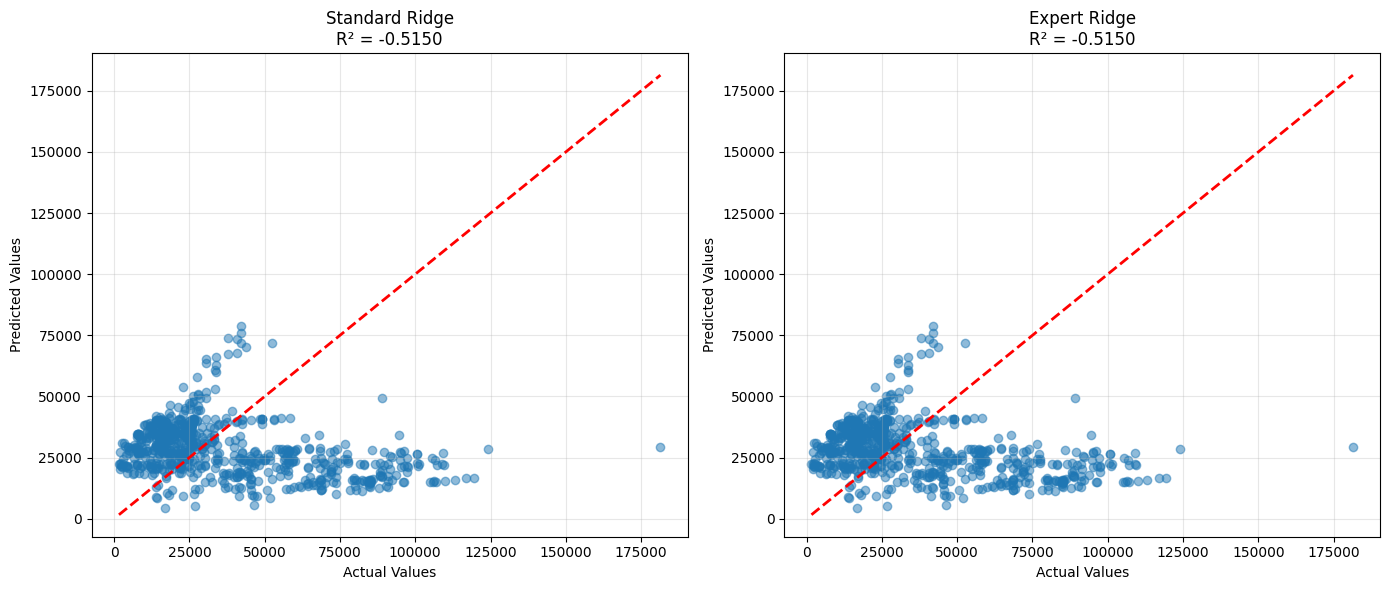

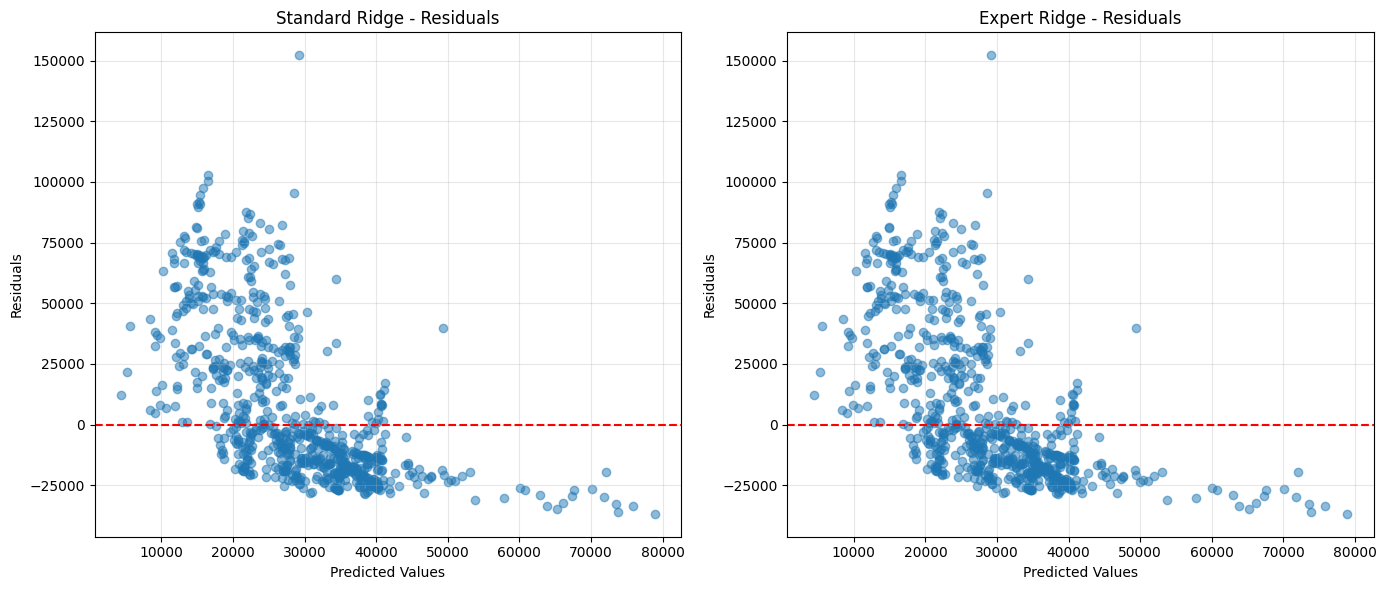

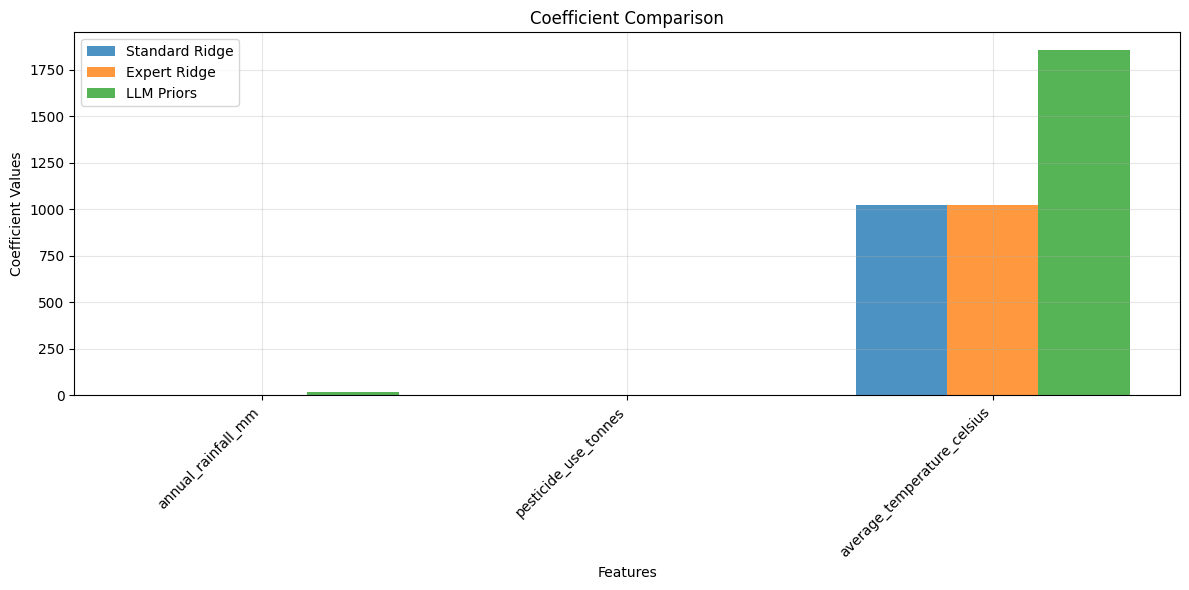

In [67]:
# =================================================
# 5. EVALUATE PERFORMANCE
# =================================================

def evaluate_models(predictions, y_test, model_names):
    """Evaluate model performance with multiple metrics"""
    results = {}
    
    print(f"\n=== MODEL EVALUATION RESULTS ===")
    print(f"{'Model':<15} {'RMSE':<10} {'MAE':<10} {'R²':<10}")
    print("-" * 50)
    
    for name in model_names:
        pred = predictions[name]
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mae = mean_absolute_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        
        results[name] = {
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'predictions': pred
        }
        
        print(f"{name:<15} {rmse:<10.2f} {mae:<10.2f} {r2:<10.4f}")
    
    return results

evaluation_results = evaluate_models(predictions, y_test, model_names)

# =================================================
# 6. DETAILED COMPARISON
# =================================================

def detailed_comparison(evaluation_results, expert_model, standard_model):
    """Detailed comparison between models"""
    print(f"\n=== DETAILED COMPARISON ===")
    
    # Performance difference
    expert_rmse = evaluation_results["Expert Ridge"]["RMSE"]
    standard_rmse = evaluation_results["Standard Ridge"]["RMSE"]
    rmse_improvement = ((standard_rmse - expert_rmse) / standard_rmse) * 100
    
    expert_r2 = evaluation_results["Expert Ridge"]["R²"]
    standard_r2 = evaluation_results["Standard Ridge"]["R²"]
    r2_improvement = expert_r2 - standard_r2
    
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")
    print(f"R² Improvement: {r2_improvement:.4f}")
    
    # Coefficient comparison
    print(f"\nCoefficient Comparison:")
    print(f"{'Feature':<25} {'Standard':<12} {'Expert':<12} {'LLM Prior':<12} {'Difference':<12}")
    print("-" * 75)
    
    feature_names = X_train.columns
    for i, feature in enumerate(feature_names):
        std_coef = standard_model.coef_[i]
        exp_coef = expert_model.coefficients_[i]
        prior = expert_model.priors_used_[i]
        diff = exp_coef - std_coef
        
        print(f"{feature:<25} {std_coef:<12.4f} {exp_coef:<12.4f} {prior:<12.4f} {diff:<12.4f}")
    
    # Intercept comparison (if standard ridge has intercept)
    if hasattr(standard_model, 'intercept_'):
        print(f"\nIntercept:")
        print(f"Standard Ridge: {standard_model.intercept_:.4f}")
        print(f"Expert Ridge: No intercept (fit_intercept=False)")

detailed_comparison(evaluation_results, expert_model, standard_model)

# =================================================
# 7. VISUALIZATIONS
# =================================================

def plot_predictions_comparison(y_test, predictions, model_names):
    """Plot predicted vs actual values for both models"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    for i, name in enumerate(model_names):
        pred = predictions[name]
        
        axes[i].scatter(y_test, pred, alpha=0.5)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')
        axes[i].set_title(f'{name}\nR² = {evaluation_results[name]["R²"]:.4f}')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_residuals_comparison(y_test, predictions, model_names):
    """Plot residuals for both models"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    for i, name in enumerate(model_names):
        pred = predictions[name]
        residuals = y_test - pred
        
        axes[i].scatter(pred, residuals, alpha=0.5)
        axes[i].axhline(y=0, color='r', linestyle='--')
        axes[i].set_xlabel('Predicted Values')
        axes[i].set_ylabel('Residuals')
        axes[i].set_title(f'{name} - Residuals')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_coefficient_comparison(expert_model, standard_model, feature_names):
    """Compare coefficients between models"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = np.arange(len(feature_names))
    width = 0.25
    
    # Plot bars
    ax.bar(x - width, standard_model.coef_, width, label='Standard Ridge', alpha=0.8)
    ax.bar(x, expert_model.coefficients_, width, label='Expert Ridge', alpha=0.8)
    ax.bar(x + width, expert_model.priors_used_, width, label='LLM Priors', alpha=0.8)
    
    ax.set_xlabel('Features')
    ax.set_ylabel('Coefficient Values')
    ax.set_title('Coefficient Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create all plots
print(f"\n=== CREATING VISUALIZATIONS ===")
plot_predictions_comparison(y_test, predictions, model_names)
plot_residuals_comparison(y_test, predictions, model_names)
plot_coefficient_comparison(expert_model, standard_model, X_train.columns)

In [68]:
# =================================================
# 8. SUMMARY
# =================================================

def print_summary(evaluation_results, expert_model):
    """Print final summary"""
    print(f"\n" + "="*60)
    print(f"FINAL SUMMARY")
    print(f"="*60)
    
    better_model = "Expert Ridge" if evaluation_results["Expert Ridge"]["RMSE"] < evaluation_results["Standard Ridge"]["RMSE"] else "Standard Ridge"
    
    print(f"Best performing model: {better_model}")
    print(f"\nLLM Priors used: {expert_model.priors_used_}")
    print(f"Domain identified by LLM: {expert_model.llm_response_.get('domain', 'unknown')}")
    
    if expert_model.llm_response_ and 'raw_response' in expert_model.llm_response_:
        print(f"\nLLM reasoning (first 200 chars):")
        print(expert_model.llm_response_['raw_response'][:200] + "...")
    
    print(f"\nKey insights:")
    expert_rmse = evaluation_results["Expert Ridge"]["RMSE"]
    standard_rmse = evaluation_results["Standard Ridge"]["RMSE"]
    
    if expert_rmse < standard_rmse:
        improvement = ((standard_rmse - expert_rmse) / standard_rmse) * 100
        print(f"- Expert Ridge reduced RMSE by {improvement:.2f}%")
        print(f"- LLM priors helped improve prediction accuracy")
    else:
        degradation = ((expert_rmse - standard_rmse) / standard_rmse) * 100
        print(f"- Expert Ridge increased RMSE by {degradation:.2f}%")
        print(f"- LLM priors may have been suboptimal for this dataset")
    
    print(f"- Dataset size: {len(X)} samples")
    print(f"- Features: {list(X.columns)}")

print_summary(evaluation_results, expert_model)


FINAL SUMMARY
Best performing model: Standard Ridge

LLM Priors used: [  18.57    3.71 1857.  ]
Domain identified by LLM: unknown

Key insights:
- Expert Ridge increased RMSE by 0.00%
- LLM priors may have been suboptimal for this dataset
- Dataset size: 3824 samples
- Features: ['annual_rainfall_mm', 'pesticide_use_tonnes', 'average_temperature_celsius']
